<a href="https://colab.research.google.com/github/varmatilak22/learning_tensorflow/blob/main/02_Neural_Network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Neural Networks classification with tensorflow

In this notebook,we're going to learn how to write neural networks for classification problem.

A classification is where you try to classify something as one thing or another.
* Binary Classification
* Multi-class classification
* Multi-label Classification

## Creating data to view and fit

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_sample=1000
# Create circles
X,y=make_circles(n_sample,noise=0.03,random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now...
Let's visualise it!

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


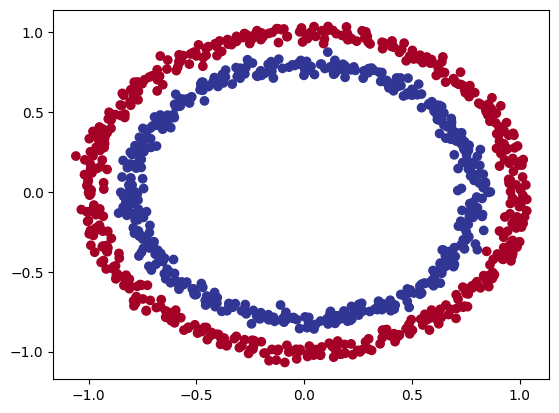

In [ ]:
# Visualise with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

⚒**Exercise**: Before pushing forward,spend 10-minutes playing around with (Playground.tensorflow.org) building and running different neural networks. See what happens when you change different hyperparameters.

## Input and Output Shapes

In [ ]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples we working
len(X),len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

#### Steps in modelling

In [ ]:
X_train=X[:800]
X_test=X[800:]
y_train=y[:800]
y_test=y[800:]

In [ ]:
X_train,X_test,y_train,y_test

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([[ 6.19725230e-01,  5.06557203e-01],
        [ 6.47077518e-01, -3.64208423e-01],
        [ 4.18714630e-01,  6.84282939e-01],
        [-6.56306805e-01, -4.35764494e-01],
        [ 4.73864310e-01,  8.21235342e-01],
        [-9.85049067e-01,  1.18959505e-01],
        [-6.67864722e-01,  4.81669594e-01],
        [-4.13239724e-01,  9.27643150e-01],
        [ 7.64005728e-01,  1.88843685e-01],
        [ 8.88928919e-01,  4.32518065e-01],
        [ 7.26291194e-01,  3.66873841e-01],
        [-4.70197299e-01,  7.87493733e-01],
        [-3.02040508e-01,  7.44972146e-01],
        [ 1.43882577e-01, -8.22794070e-01],
        [-1.65980756e-01, -7.68488677e-01],
        [-2.74275495e-01, -7.41031770e-01],
        [ 5.97240716e-01, -5.66165658e-01],
        [-8.03313695e

In [ ]:
import tensorflow as tf
import numpy as pd

In [ ]:
#Building a model
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(None,2)),
        tf.keras.layers.Dense(100,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

# 2.Compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
              )

# 3.fit a model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7000 - accuracy: 0.4725
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5475
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5188
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5638
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6150
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.7113
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6488
Epoch 11/

In [ ]:
# Evaluate a model
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 1.0000


[0.17399172484874725, 1.0]

In [ ]:
y_pred=model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0.8200918 , 0.94414556, 0.84878397, 0.8836794 , 0.30157596,
       0.13652423, 0.8217637 , 0.10835499, 0.88440156, 0.16859727,
       0.82393837, 0.44441834, 0.85470617, 0.78134334, 0.86118346,
       0.8506809 , 0.77801245, 0.8087151 , 0.15419562, 0.80955416,
       0.11978156, 0.85143447, 0.82910764, 0.8759591 , 0.13814102,
       0.7238298 , 0.8501001 , 0.27951786, 0.10070076, 0.8956554 ,
       0.11840851, 0.8182248 , 0.8303982 , 0.13306002, 0.22810192,
       0.84985465, 0.82723933, 0.72791076, 0.94418275, 0.9311244 ,
       0.89892554, 0.73287445, 0.8851029 , 0.06702235, 0.94939476,
       0.7763534 , 0.79303426, 0.11357971, 0.88024193, 0.16238767,
       0.20359355, 0.82020855, 0.8841078 , 0.27481169, 0.08706737,
       0.06869303, 0.8919846 , 0.12167706, 0.17800872, 0.8234162 ,
       0.08190152, 0.06696541, 0.1453212 , 0.7996719 , 0.09437363,
       0.817968  , 0.15555207, 0.32451752, 0.12125157, 0.08718274,
       0.90162

In [ ]:
y_pred[:10],y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.8200918 , 0.94414556, 0.84878397, 0.8836794 , 0.30157596,
        0.13652423, 0.8217637 , 0.10835499, 0.88440156, 0.16859727],
       dtype=float32)>,
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]))

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak...
6. Evaluate...

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1.Create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.fit a model
model_1.fit(X_train,y_train,epochs=5)

Epoch 1/5
25/25 [==============================] - 1s 3ms/step - loss: 1.8908 - accuracy: 0.4800
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.4850
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.4913
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.4900
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4975


In [ ]:
#Let's try and improve our model by training for longer...
model_1.fit(X_train,y_train,epochs=200,verbose=0)
model_1.evaluate(X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5225


[0.6924806237220764, 0.5224999785423279]

Since we're working on a binary classification problem and our model is getting around -50% accuray... it's performing as if it's guessing.

So let's step things up a notch and an extra layer.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.fit a model
model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# 4.Evaluate the model
model_2.evaluate(X_train,y_train)


25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5312


[0.6925471425056458, 0.53125]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - We might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - Here we might to choose a different optimization function such as Adam instead of SGD.
3. fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 3.fit a model
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 2.7272 - accuracy: 0.4712
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4863
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4387
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4825
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5125
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5213
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5213
Epoch 11/

In [ ]:
# 4 Evaluate a model
model_3.evaluate(X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5125


[0.6925653219223022, 0.512499988079071]

In [ ]:
y_pred=model_3.predict(X_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[0.518905  ],
       [0.50874484],
       [0.5169564 ],
       [0.48103648],
       [0.51977795],
       [0.48110133],
       [0.49209654],
       [0.5028295 ],
       [0.51796216],
       [0.5235342 ],
       [0.51937836],
       [0.4999312 ],
       [0.5028688 ],
       [0.49274033],
       [0.48703128],
       [0.48514044],
       [0.505232  ],
       [0.48552364],
       [0.519054  ],
       [0.5186153 ],
       [0.4812623 ],
       [0.48400533],
       [0.5173666 ],
       [0.49594605],
       [0.51171434],
       [0.5195187 ],
       [0.49317396],
       [0.48878217],
       [0.49141017],
       [0.4812787 ],
       [0.49326482],
       [0.48161745],
       [0.48477462],
       [0.48498824],
       [0.5196645 ],
       [0.48186362],
       [0.50632745],
       [0.5030949 ],
       [0.5119774 ],
       [0.4855035 ],
       [0.5184258 ],
       [0.48636508],
       [0.4963556 ],
       [0.51815593],
       [0.4822216 ],
       [0.48679295],
       [0.51811767],
       [0.497

🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of,remember these three words:
**Visualise**,**Visualise**,**Visualise**.
Inspect your data,inspect your model,inspect your model's predictions.


To visualise our model's predictions ,let's create a function `plot_decision_boundary()`, this function will :

* Take in a trained model,features (X) and labels (y)
* Create a meshgrid of the different X values
* Make Predicitions across the meshgrid
* Plots the predictions as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np


In [ ]:

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min() - 0.1,X[:,0].max() + 0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  # Create X Value (we're going to make predictions on these)
  x_in=np.c_[xx.ravel(),yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred=model.predict(x_in)

  # Check for multi-class classification
  if len(y_pred[0])>1:
    print("doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


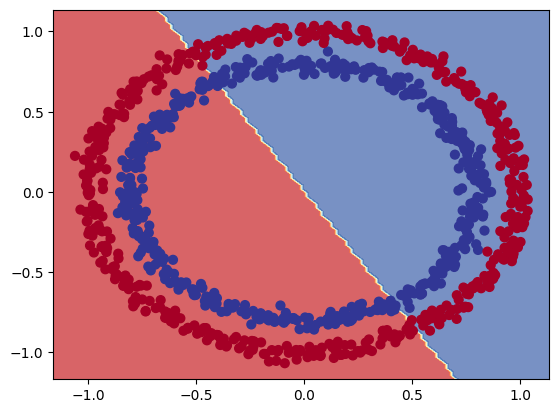

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
x_min,x_max=X[:,0].min() - 0.1,X[:,0].max() + 0.1
y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
#Lets see if our model can be used for a regression problem...
tf.random.set_seed(42)

# 1.Create some regresssion data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) #y=X+100

# split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test= X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem,let's change the model suit



In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1.Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3.fit a model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 445.8210 - mae: 445.8210
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 327.2612 - mae: 327.2612
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 212.0453 - mae: 212.0453
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 91.7081 - mae: 91.7081
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 62.3761 - mae: 62.3761
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 91.0357 - mae: 91.0357
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 67.2804 - mae: 67.2804
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.7359 - mae: 43.7359
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 49.5825 - mae: 49.5825
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6950 - mae: 41.6950
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


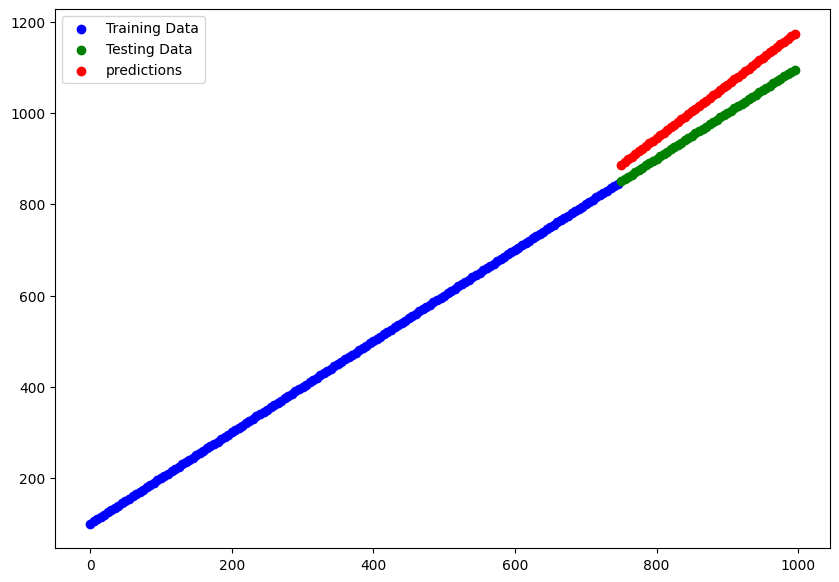

In [ ]:
# Make predicions with our trained model
y_reg_preds=model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing Data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")
plt.legend();

## The Missing Values:Non-Linearity

In [ ]:
# Set he random seed
tf.random.set_seed(42)

# 1.Create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.fit a model
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.8848 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 11/

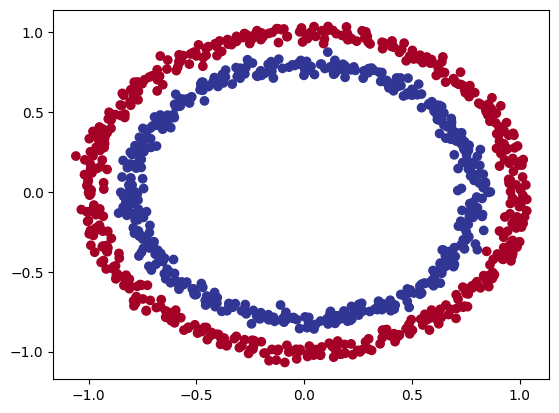

In [ ]:
#Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
Doing binary classification


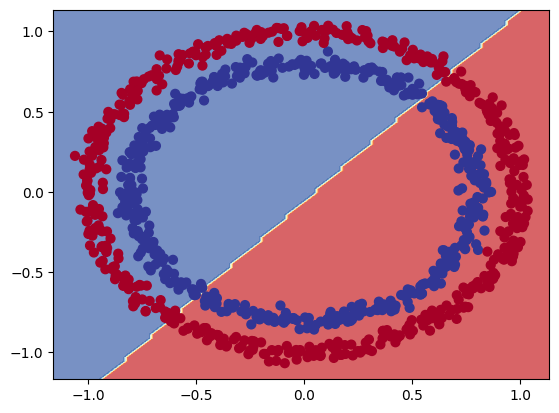

In [ ]:
# Check the decision boundary of our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Lets try build our first neural network with non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model with a non-linear activation
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2.compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.Fit the model
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

From my observation and experimentation I have found
that this must the hyperparameters:
* 1 dense layer
* 3 Neurons
* Activation function must be RELU(Rectified Linear Unit)
* Learning Rate=0.001
* No Regularisation
  1. Regualarisation helps computer becomes more smarter learner by avoiding overthinking and memorisation.Instead , it learns the essential things that apply to different situations ,making it better at recognizing new things.
* Classification Problem

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(3,activation="relu")
])

# 2. Compile a model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit a model
history=model_6.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 3.7477 - accuracy: 0.2362
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 3.1776 - accuracy: 0.2387
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 2.9259 - accuracy: 0.2338
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 2.7432 - accuracy: 0.2225
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 2.6947 - accuracy: 0.2200
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 2.6422 - accuracy: 0.2237
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 2.6035 - accuracy: 0.2250
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 2.5533 - accuracy: 0.2288
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 2.4851 - accuracy: 0.2275
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 2.3073 - accuracy: 0.2300
Epoch 11/

In [ ]:
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.4400


[0.5062673091888428, 0.4399999976158142]

In [ ]:
len(X_train)

800

In [ ]:
# Time to replace the multi-layer neural networks from tensorflow playground

# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.Fit a model
history=model_7.fit(X,y,epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate a model
model_7.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


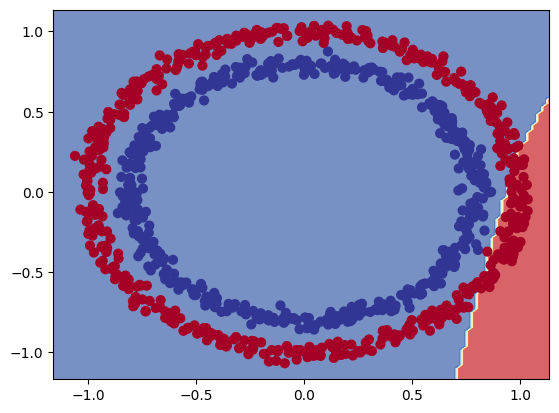

In [ ]:
# How our model predictions look?
plot_decision_boundary(model_7,X,y)

In [ ]:
import pandas as pd

<Axes: >

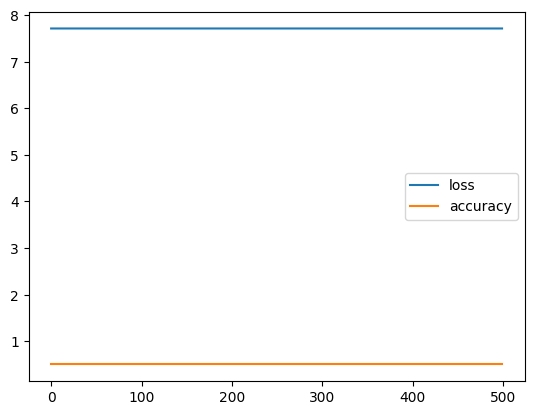

In [ ]:

pd.DataFrame(history.history).plot()

In [ ]:

## Create a model using output layer activtaion function

# set random seed
tf.random.set_seed(42)

# 1.Create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile a model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit a model
history=model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 0.7081 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4760
Epoch 11/

<Axes: >

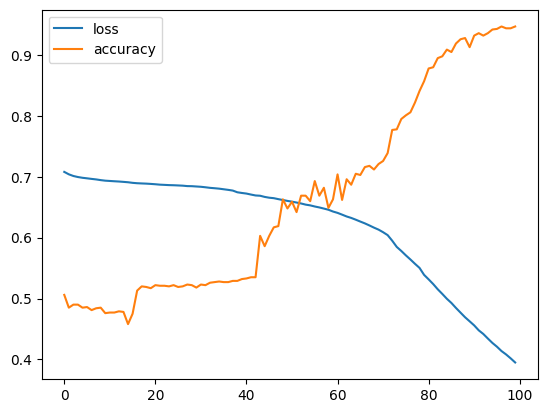

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_8.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.9510


[0.390299528837204, 0.9509999752044678]

In [ ]:
#Time to replicate the multi-layer neural networks from tensorflow playground


# set random seed
tf.random.set_seed(42)

# 1.Create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2.Compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.Fit a model
history_1=model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 4ms/step - loss: 1.0568 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8814 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8127 - accuracy: 0.4770
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7833 - accuracy: 0.4420
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7699 - accuracy: 0.4160
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7619 - accuracy: 0.3920
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7567 - accuracy: 0.3640
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7525 - accuracy: 0.3490
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7490 - accuracy: 0.3480
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7460 - accuracy: 0.3530
Epoch 11/

In [ ]:
#Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9750


[0.08698448538780212, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


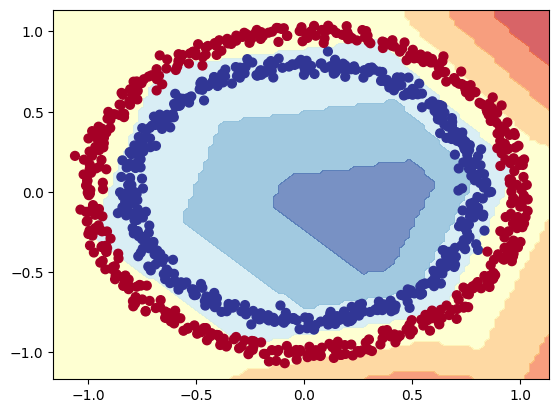

In [ ]:
# How to our model predictions look?
plot_decision_boundary(model_7,X,y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.Compile a model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3.fit a model
history_2=model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6898 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5140
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5320
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6871 - accuracy: 0.5380
Epoch 9/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6866 - accuracy: 0.5400
Epoch 10/100
32/32 [==============================] - 1s 20ms/step - loss: 0.6863 - accuracy: 0.5260
Epoch 1

In [ ]:
# Models Evaluation
model_8.evaluate(X,y)

NameError: ignored

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 6ms/step - loss: 0.0870 - accuracy: 0.9750


[0.08698448538780212, 0.9750000238418579]

313/313 [==============================] - 2s 5ms/step
Doing binary classification


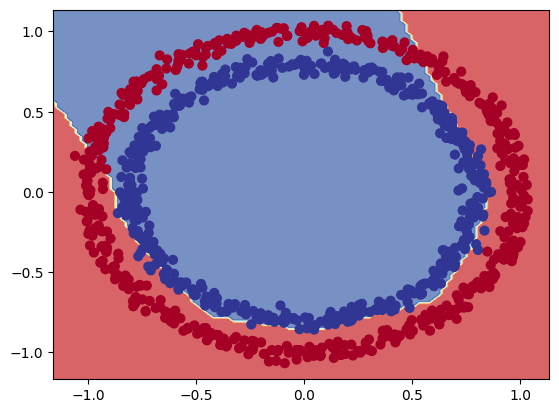

In [ ]:
# Lets visualise our incredible metrics
plot_decision_boundary(model_8,X,y)

**Question**: Whats wrong with the predictions we make?
Are we really evaluating our model correctly?
Hint:What data did the model learn on and what data did we predict on?

🔑 **Note**: The combination of **linear(Straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions(or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

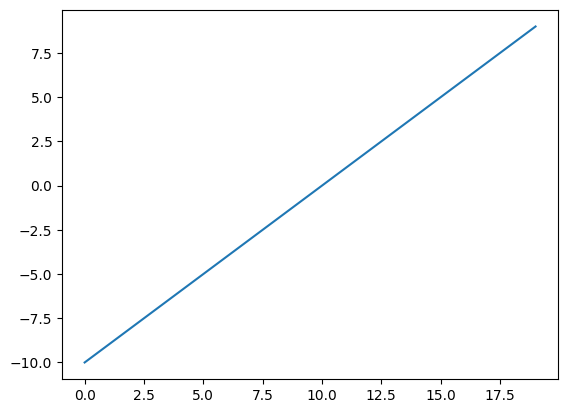

In [ ]:
# Visualise our toy tensor
plt.plot(A);

In [ ]:
# Lets start by replicating sigmoid - sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

NameError: ignored

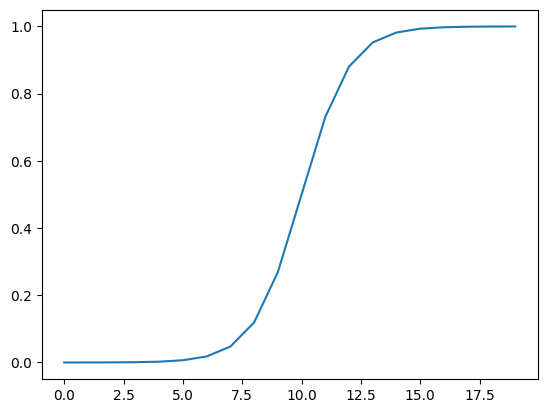

In [ ]:
 # Plot our toy tensor transformed by sigmoid
 plt.plot(sigmoid(A));

In [ ]:
#Lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

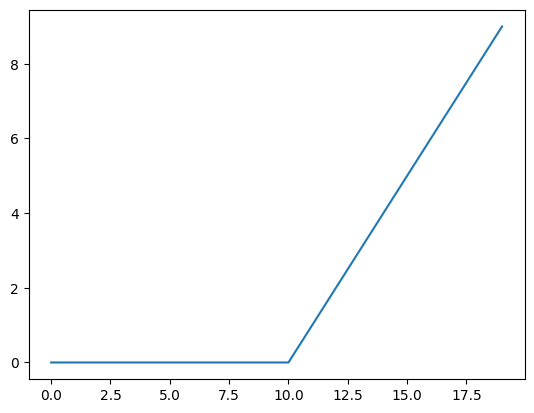

In [ ]:
# Plot RELU-modified tensor
plt.plot(relu(A));

In [ ]:
# Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

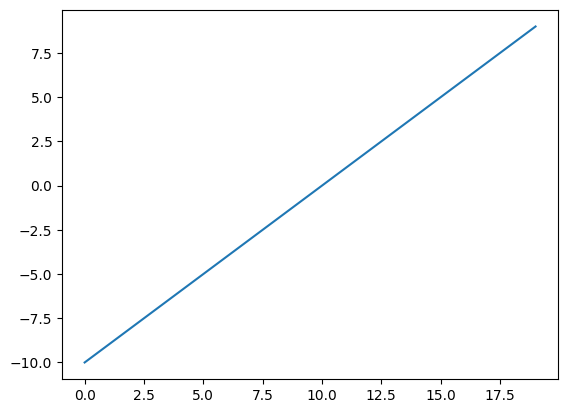

In [ ]:
 # Does the linear activation function change anything?
 plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So lets Create a training and test set.

In [ ]:
# Check how many examples we have
len(X),len(y)

(1000, 1000)

In [ ]:
# Split data into training and test sets

# 1. Data split by indexing
X_train=X[:800]
y_train=y[:800]
X_test=X[800:]
y_test=y[800:]
X_train,y_train

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
 # 2.Split data using train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=21)
X_train1,y_train1

(array([[-0.45518871,  0.85610872],
        [ 0.69700854,  0.23237153],
        [ 0.3995546 , -0.90072039],
        ...,
        [ 0.88327136, -0.51784765],
        [ 0.42280097, -0.70874331],
        [-0.91562921, -0.3349477 ]]),
 array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 

In [ ]:
X_train.shape,y_train.shape

((800, 2), (800,))

In [ ]:
#Let's recreate  a model to fit on the training data and evaluate from the testing data

# Set the random seed
tf.random.set_seed(42)

# 1.Create a model(Same model as model_8)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.Compile a model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3.fit a model
history_3=model_9.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5225
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5312
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5300
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.5462
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6212
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6087
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.6500
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6625
Epoch 11/

In [ ]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (32, 4)                   12        
                                                                 
 dense_30 (Dense)            (32, 4)                   20        
                                                                 
 dense_31 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# 4.Evaluate the model on the test dataset
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1136 - accuracy: 0.9600


[0.11355514824390411, 0.9599999785423279]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


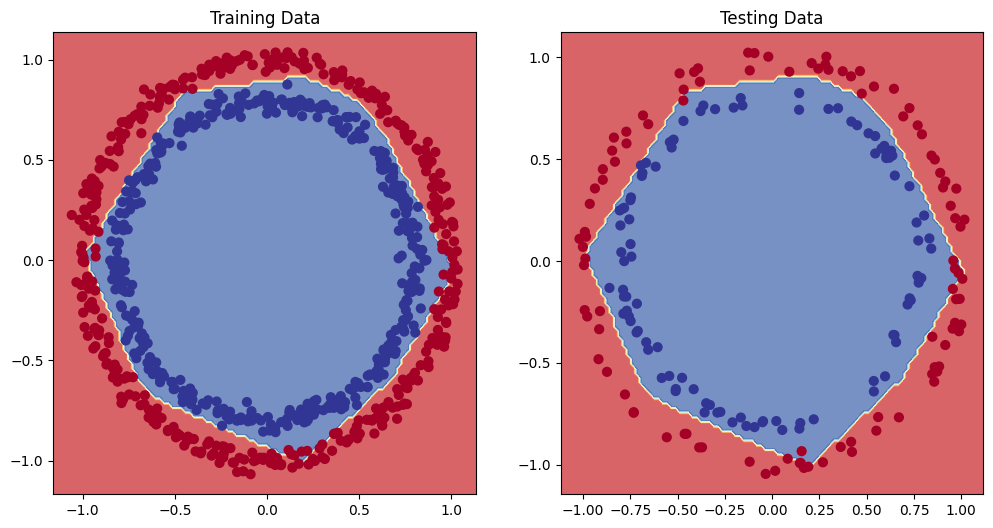

In [ ]:
 # Plot decision boundaries for training and test datastes
 plt.figure(figsize=(12,6))
 plt.subplot(1,2,1)
 plt.title("Training Data")
 plot_decision_boundary(model_9,X=X_train,y=y_train)
 plt.subplot(1,2,2)
 plt.title("Testing Data")
 plot_decision_boundary(model_9,X=X_test,y=y_test)
 plt.show();

## Plot the loss (or training curve)


In [ ]:
#Convert the history object into a DataFrame
pd.DataFrame(history_3.history)

,loss,accuracy
0,0.696138,0.52250
1,0.685545,0.53125
2,0.680905,0.51250
3,0.677531,0.53000
4,0.672168,0.63500
...,...,...
95,0.079141,0.97875
96,0.072070,0.97875
97,0.069359,0.98000
98,0.072140,0.98000


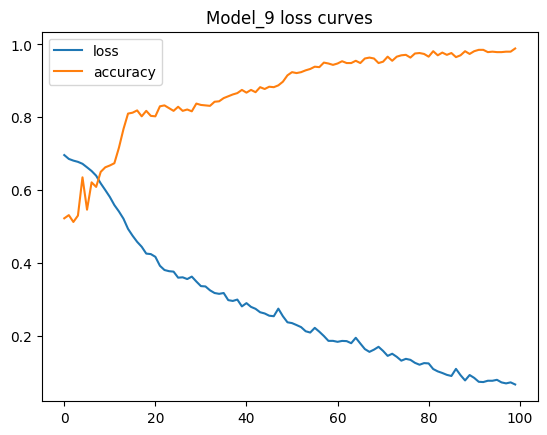

In [ ]:

# Plot the loss curves
pd.DataFrame(history_3.history).plot()
plt.title("Model_9 loss curves");


🔑**Note:** For many problems the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best Learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A Learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model **While** its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. COmpile a model
model_10.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create a learning rate  callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3.Fit a model (passing lr-scheduler callback)
history_4=model_10.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7049 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochss'>

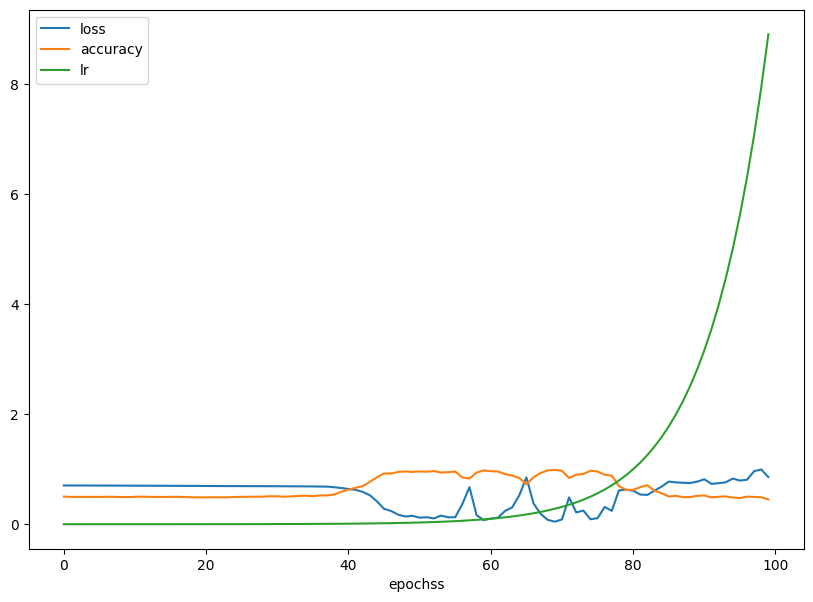

In [ ]:
# Check out the history
pd.DataFrame(history_4.history).plot(figsize=(10,7),xlabel="epochss")

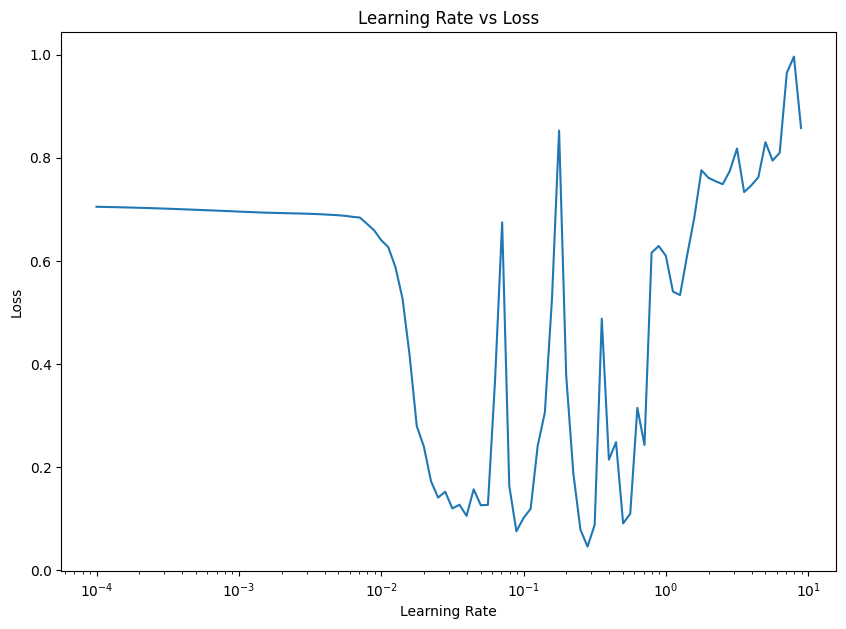

In [ ]:
# PLot the learning rate versus the loss
lrs= 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
len(lrs)

100

In [ ]:
# Example of other typical learning rates values:
10**0 , 10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
10**-2

0.01

In [ ]:
 # Lets try using higher *Ideal* learning rate with the same model

 # Set random seed
 tf.random.set_seed(42)

 # 1. Create a model
 model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
 ])

 # 2. Compile a model with the ideal learning rate
 model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                  metrics=["accuracy"])
 # 3 .fit a model for 80 epochs(20 less than before)
 history_11=model_11.fit(X_train,y_train,epochs=80)

Epoch 1/80
25/25 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5587
Epoch 2/80
25/25 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6012
Epoch 3/80
25/25 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6263
Epoch 4/80
25/25 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7188
Epoch 5/80
25/25 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7163
Epoch 6/80
25/25 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7588
Epoch 7/80
25/25 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8263
Epoch 8/80
25/25 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8587
Epoch 9/80
25/25 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.9000
Epoch 10/80
25/25 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9237
Epoch 11/80
25/25 [

In [ ]:

# Evaluate model_10 on the test dataset
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9800


[0.040075358003377914, 0.9800000190734863]

In [ ]:
# Evaluaate model_9 on the test data
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9600


[0.11355514824390411, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


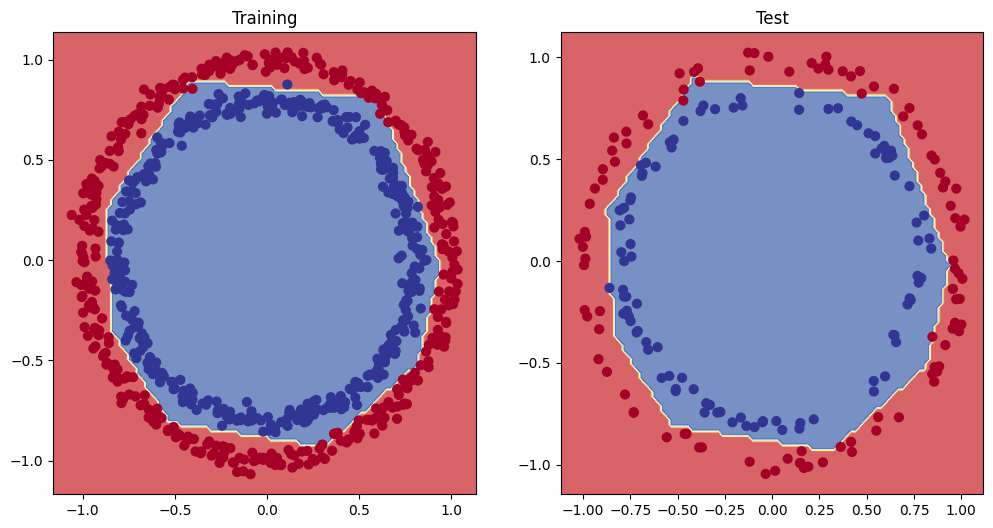

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_11,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11,X=X_test,y=y_test)
plt.show()


## More classification evaluation methods

Alongside visualizing our models results as mush as possible, there a handful of other classification evaluation methods & metrics you should be familier with :
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss,accuracy=model_11.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model Accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9800
Model loss on the test set:0.040075358003377914
Model Accuracy on the test set:98.00%


### How about confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred=model_11.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
 y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[9.9944812e-01],
       [9.9999785e-01],
       [9.9990249e-01],
       [9.9991572e-01],
       [4.0905467e-01],
       [3.5322752e-05],
       [9.4292271e-01],
       [9.6997514e-02],
       [9.9828106e-01],
       [1.0997751e-04]], dtype=float32)

OOPS.. Looks like our predictions array has comes out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_pred))

array([[98,  3],
       [ 1, 98]])

How about we prettify our confusion matrix?

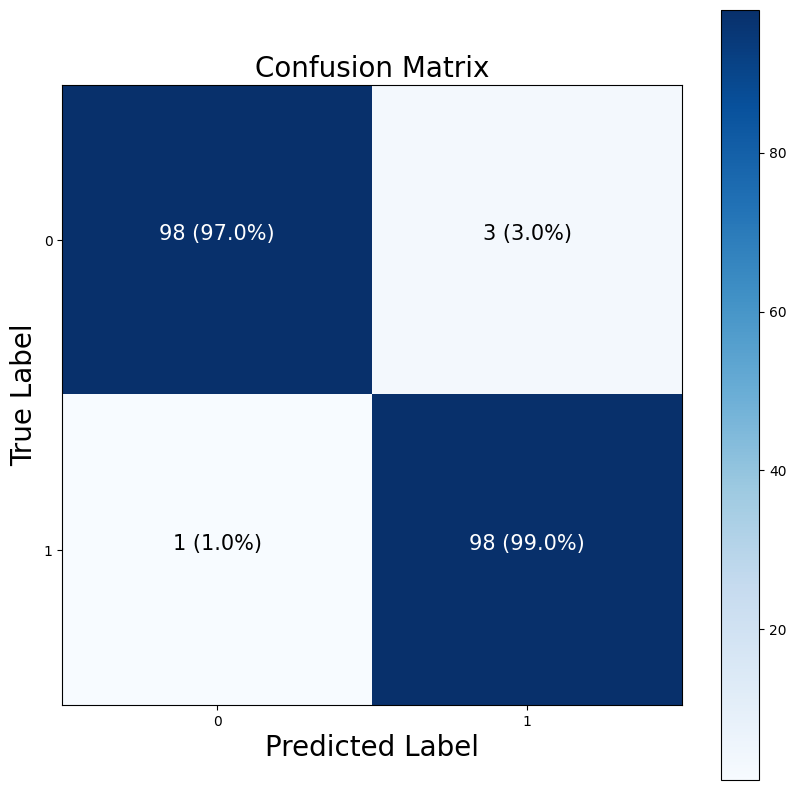

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learns plot_confusion_matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_pred))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:np.newaxis] # Normalised our confusion matrix
n_classes=cm.shape[0]

# Lets prettify it
fig,ax=plt.subplots(figsize=figsize)

# Create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold=(cm.max() + cm.min()) / 2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j,]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

In [ ]:
cm.shape[0]

2

### Defining a plot confusion matrix function

Its is remix of scikit-learns plot_confusion_matrix in function form.


In [ ]:
def plot_confusion_matrix(y_true,y_pred):
  import itertools

  figsize=(7,7)

  # Create a confusion matrix
  cm=confusion_matrix(y_test,tf.round(y_pred))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]

  # normalise our matrix
  n_classses=cm.shape[0]

  # Lets prettify it
  fig,ax=plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes=False

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust labelsize

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)

  # Set threshold for different colors
  threshold=(cm.max()+cm.min())/2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]> threshold else "black", size=15)

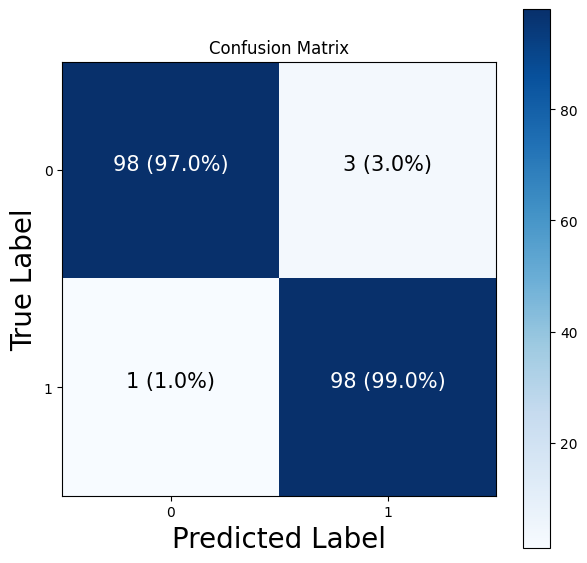

In [ ]:
plot_confusion_matrix(y_test,y_pred)

# Working with a larger example (multi-class classification)
 When you have more than two classes as an option, it's known as **multi-class classification**.
 * This means if you have 3 different classes , its a multi-class classification.
 * It also means if you have 100 different classes ,its multi-class classification.

 To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.




In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us.
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first traiing examples
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

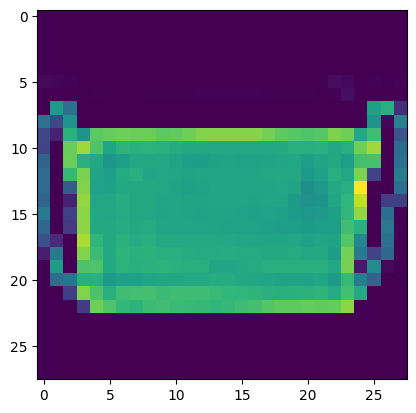

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[130]);

In [ ]:
# Check our samples labels
train_labels[130]

8

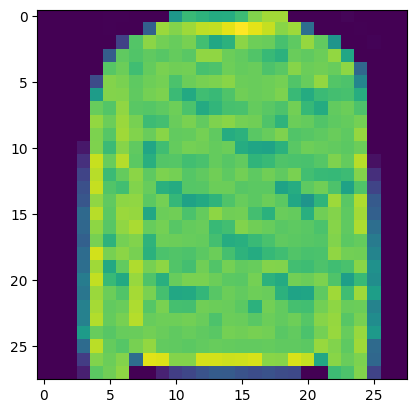

In [ ]:
plt.imshow(train_data[234])

In [ ]:
train_labels[234]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

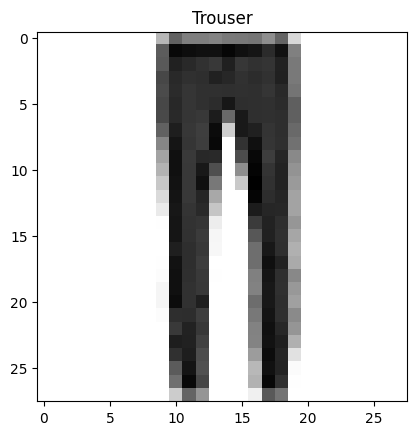

In [ ]:
# Plot an example image and its label
index_of_choice = 170
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

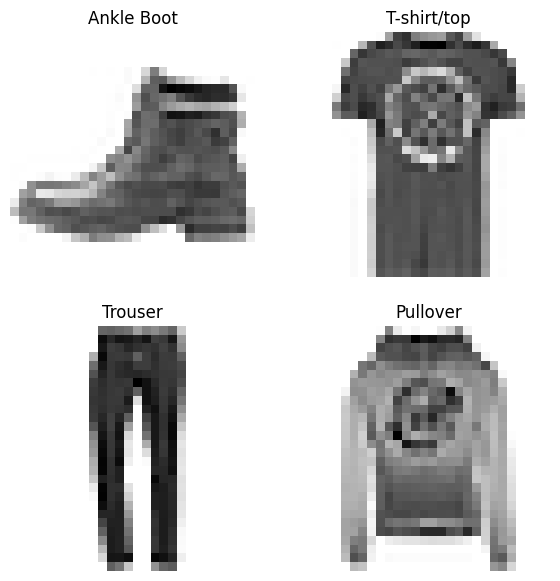

In [ ]:
#Plot multiple  random iamges of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input Shape =  28 x 28  (shape of one images)
* Output Shape = 10 (1 per class per clothing)
* loss function=tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one-hot encoded , use CategoricalCrossentropy()
  * And If your labels are integer form use SparseCategoricalCrossentropy()
* optimizer= Adam()
* Output Activation function= Softmax
* Input Activation function = relu(Rectified Linear Unit)



In [ ]:
# Our data needs to be flattened (from 28 * 28 to None,784)
flatten_model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
    ])

flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
tf.one_hot(train_labels[:10],depth=(10))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
 # Set random seed
tf.random.set_seed(42)

# 1.Create a model
multi_class_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile a model
multi_class_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["accuracy"])
# 3. Fit a model
non_norm_history=multi_class_model.fit(train_data,
                                       tf.one_hot(train_labels,depth=10),
                                       epochs=10,
                                       validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1413 - accuracy: 0.1765 - val_loss: 1.9617 - val_accuracy: 0.2077
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8639 - accuracy: 0.2621 - val_loss: 1.7901 - val_accuracy: 0.2769
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6683 - accuracy: 0.3202 - val_loss: 1.6564 - val_accuracy: 0.2610
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5166 - accuracy: 0.3201 - val_loss: 1.5130 - val_accuracy: 0.3048
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4848 - accuracy: 0.3251 - val_loss: 1.4669 - val_accuracy: 0.3304
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4489 - accuracy: 0.3424 - val_loss: 1.4461 - val_accuracy: 0.3678
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4273 - accuracy: 0.3584 - val_loss: 1.4162 - val_accuracy:

In [ ]:
# Check the model summary
multi_class_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized),this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between - 0 and 1 by dividing by the maximum.
train_data_normal = train_data /  255.0
test_data_normal = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_normal.min(),train_data_normal.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalised,let's build a model to find patterns in it

#Set random seed
tf.random.set_seed(42)

# 1.Create a model
multi_model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ]
)

# 2. Compile a model
multi_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# 3. Fit a model
norm_history=multi_model.fit(train_data_normal,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_normal,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5519 - accuracy: 0.3789 - val_loss: 1.3735 - val_accuracy: 0.4180
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3339 - accuracy: 0.4370 - val_loss: 1.3013 - val_accuracy: 0.4740
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1802 - accuracy: 0.5294 - val_loss: 1.0513 - val_accuracy: 0.6048
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9547 - accuracy: 0.6524 - val_loss: 0.9177 - val_accuracy: 0.6857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8612 - accuracy: 0.6896 - val_loss: 0.8563 - val_accuracy: 0.7064
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8193 - accuracy: 0.7007 - val_loss: 0.8322 - val_accuracy: 0.7123
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7944 - accuracy: 0.7099 - val_loss: 0.8041 - val_accuracy:

> 🔑 **Note:** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1 ).

<Axes: title={'center': 'Normalized Data'}>

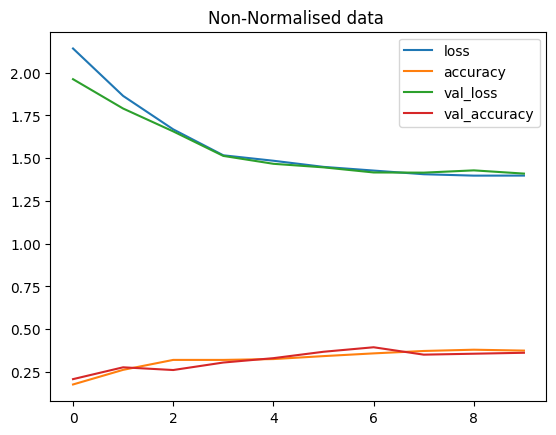

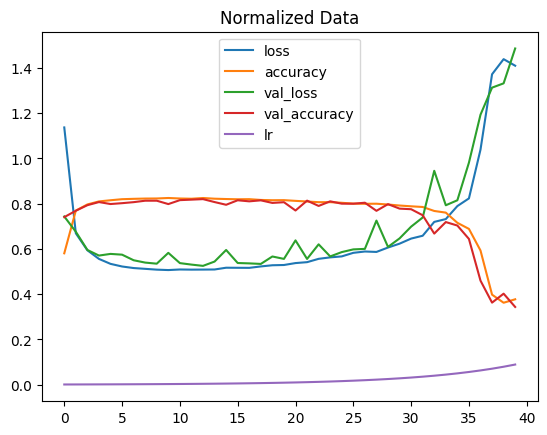

In [ ]:
# Plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalised data ")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

> 🔑 **Note:** The same model with even *sightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:

# Now our data is normalised,let's build a model to find patterns in it

#Set random seed
tf.random.set_seed(42)

# 1.Create a model
multi_model_1=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ]
)

# 2. Compile a model
multi_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# 3. Fit a model
find_lr_history=multi_model_1.fit(train_data_normal,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_normal,test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 3ms/step - loss: 1.2463 - accuracy: 0.5530 - val_loss: 0.8884 - val_accuracy: 0.7334 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7839 - accuracy: 0.7486 - val_loss: 0.7559 - val_accuracy: 0.7428 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6882 - accuracy: 0.7704 - val_loss: 0.6874 - val_accuracy: 0.7686 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6468 - accuracy: 0.7837 - val_loss: 0.6670 - val_accuracy: 0.7775 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6281 - accuracy: 0.7882 - val_loss: 0.6463 - val_accuracy: 0.7801 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6160 - accuracy: 0.7916 - val_loss: 0.6520 - val_accuracy: 0.7826 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the Ideal learning rate')

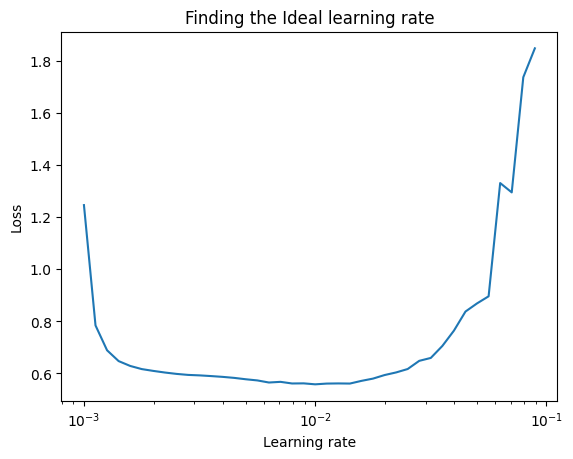

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt


lrs=1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal learning rate")


In [ ]:
10**-3

0.001

In [ ]:
 #Let's refit the model with ideal learning_rate

 # set Random seed
 tf.random.set_seed(2)

 # Create model
 model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
 ])

 # Compile a model
 model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])

 # fit a model
 history_14=model_14.fit(train_data_normal,
                         train_labels,
                         epochs=20,
                         validation_data=(test_data_normal,test_labels)
                         )

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.5234 - accuracy: 0.4016 - val_loss: 1.0810 - val_accuracy: 0.5860
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9217 - accuracy: 0.6334 - val_loss: 0.8898 - val_accuracy: 0.6382
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8225 - accuracy: 0.6614 - val_loss: 0.8244 - val_accuracy: 0.6815
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7598 - accuracy: 0.7058 - val_loss: 0.7826 - val_accuracy: 0.7036
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7151 - accuracy: 0.7321 - val_loss: 0.7345 - val_accuracy: 0.7277
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6847 - accuracy: 0.7472 - val_loss: 0.7013 - val_accuracy: 0.7455
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6515 - accuracy: 0.7612 - val_loss: 0.6849 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion_matrix)
* Asses some of its predictions (through visualisations).
* Improve its results (by training it for longer or changing the architecture )
* Save and export it for use in an application

Let's go through the top 2...


In [ ]:
# Create a confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

   #Create a confusion_matrix
   cm=confusion_matrix(y_true,tf.round(y_pred))
   cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalise our confusion matrix
   n_classes=cm.shape[0]

   # Let's prettify it
   fig,ax=plt.subplots(figsize=figsize)
   #Create a matrix plot
   cax=ax.matshow(cm,cmap=plt.cm.Blues)
   fig.colorbar(cax)

   #Set labels to be classes
   if classes:
    labels=classes
   else:
    labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion_matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set threshold for different colors
    threshold = (cm.max()+ cm.min())/2

    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.f}%)",
               horizontalalignment="center",
               color="white" if cm[i,j]>threshold else "black",
               size=text_size)


In [ ]:
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Make some predictions
y_probs=model_14.predict(test_data_normal) # Probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.5070955e-08, 5.9314811e-04, 2.5167884e-15, 4.7192731e-05,
        9.2545224e-06, 1.2337902e-01, 5.5703825e-10, 9.0700306e-02,
        6.1163330e-04, 7.8465945e-01],
       [2.1383727e-02, 5.5057476e-03, 7.2290152e-01, 1.1429741e-02,
        9.3668550e-02, 5.0187681e-04, 1.4365602e-01, 4.3248993e-04,
        4.7151686e-04, 4.8706814e-05],
       [2.2959130e-09, 9.9552047e-01, 2.9206505e-11, 5.5387418e-04,
        2.6597842e-04, 1.2601764e-10, 1.4623713e-10, 6.2548193e-06,
        1.7060939e-08, 3.6534371e-03],
       [2.2485250e-11, 9.9812132e-01, 5.9319574e-14, 8.2346065e-05,
        1.5049656e-05, 6.3697599e-13, 4.5865921e-13, 5.4271715e-07,
        3.2106282e-10, 1.7807627e-03],
       [3.1203023e-01, 4.0888172e-04, 1.2658258e-01, 4.1207291e-02,
        3.9632688e-03, 5.3800282e-04, 5.1229119e-01, 7.4292519e-05,
        2.8650814e-03, 3.9174614e-05]], dtype=float32)

In [ ]:
test_data[:0],test_data_normal[:0]

(array([], shape=(0, 28, 28), dtype=uint8),
 array([], shape=(0, 28, 28), dtype=float64))

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g.if your model
was trained on normalized data, you'll want to make predictions on normalized data ).

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([2.5070955e-08, 5.9314811e-04, 2.5167884e-15, 4.7192731e-05,
        9.2545224e-06, 1.2337902e-01, 5.5703825e-10, 9.0700306e-02,
        6.1163330e-04, 7.8465945e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
 # Convert all of the predictions probabilities into integers
 y_pred=y_probs.argmax(axis=1)

 # View the first 10 prediction labels
 y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_pred)

array([[747,   0,  33,  72,   5,   0, 136,   0,   7,   0],
       [  2, 942,  11,  26,  13,   0,   6,   0,   0,   0],
       [ 16,   2, 753,  10, 142,   0,  76,   0,   1,   0],
       [ 39,  19,  17, 826,  35,   0,  58,   0,   6,   0],
       [  0,   5, 189,  29, 720,   0,  47,   0,  10,   0],
       [  0,   0,   0,   1,   0, 865,   0,  81,   8,  45],
       [170,   1, 185,  51, 124,   0, 454,   0,  15,   0],
       [  0,   0,   0,   0,   0,  21,   0, 929,   0,  50],
       [  3,   0,   2,  10,  15,  10,  62,   4, 891,   3],
       [  0,   0,   0,   3,   0,   7,   1,  36,   0, 953]])

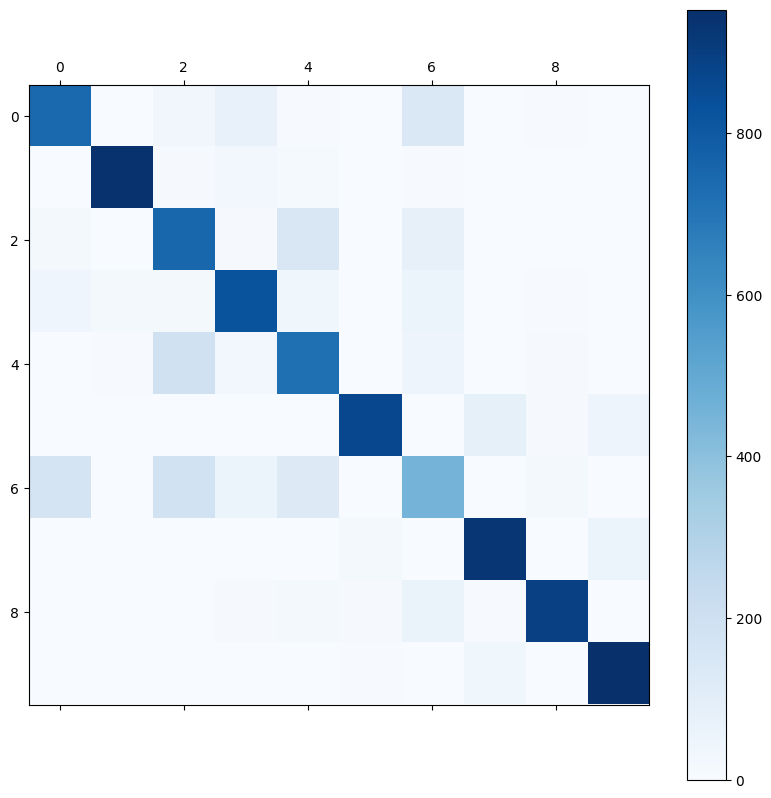

In [ ]:
# Make confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(10,10),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data,it's a good idea to visualise as much as possible to develop a further understanding of the data and the inputs and output of your models.

How about we create a further a fun little function for:
* Plot a random image
* Make a prediction on said Image
* Label the plot with the truth label & the predicted label


In [ ]:
import random


def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.

  """
  # Set up random integer
  i= random.randint(0,len(images))

  # Create predictions and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28,))
  pred_label=classes[pred_probs.argmax()]
  true_label= classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions is right or wrong
  if pred_label== true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information (predictions /true label)
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color) # set the color to green or red based on if predictions is right or wrong



1/1 [==============================] - 0s 22ms/step


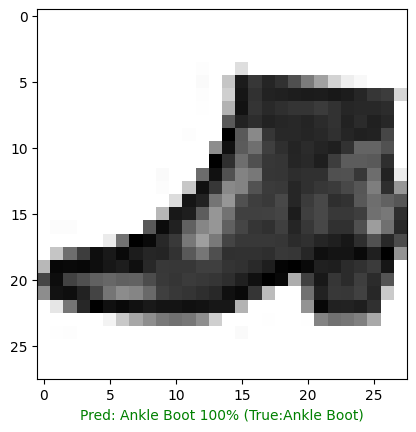

In [ ]:
# Check out a random Image as well as its predictions
plot_random_image(model=model_14,
                  images=test_data_normal,  #  always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our Machine Learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# GEt the patterns of a layer in our network
weights,biases=model_14.layers[1].get_weights()


# Shapes
weights,weights.shape

(array([[ 0.02665225, -0.35493073,  0.31014562, -0.02665616],
        [ 0.80149484, -0.61361444,  0.3122031 ,  0.41566345],
        [ 0.3533019 , -0.90130144,  1.1634339 ,  0.32123622],
        ...,
        [-0.07000808, -0.42891473, -0.108949  , -0.16429558],
        [ 0.17050157, -0.02034409, -0.45421666, -0.33953682],
        [ 0.47238088, -0.24492942,  0.3524419 , -1.2375782 ]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_14.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now lets check out bias vector

In [ ]:
# Bias and biases shapes
biases,biases.shape

(array([1.7993604, 2.550618 , 1.0024897, 2.677545 ], dtype=float32), (4,))

Every Neurons has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a Tensorflow Dense Layer).

The Bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


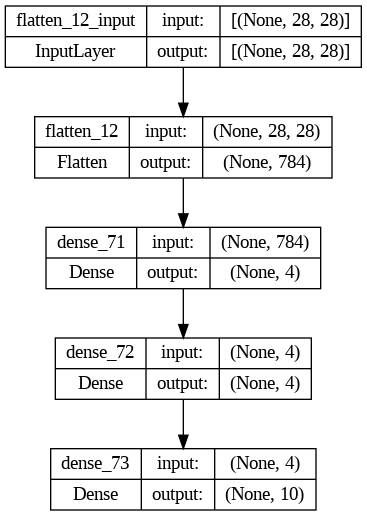

In [ ]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layers
plot_model(model_14,show_shapes=True)